In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,regularizers

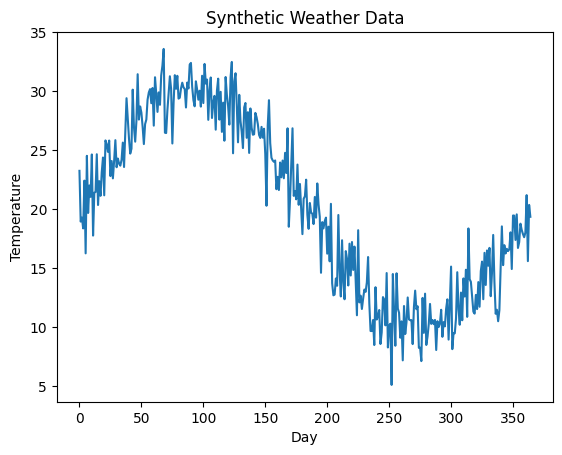

In [2]:
np.random.seed(1)
time_points = np.arange(365)

temperature = 10 * np.sin(2 * np.pi * time_points / 365) + 20 + np.random.normal(0, 2, 365)

plt.plot(time_points, temperature)
plt.title('Synthetic Weather Data')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.show()

In [3]:
# Normalization
temperature_data = (temperature - np.mean(temperature)) / np.std(temperature)

steps = 10
X = []
Y = []

for i in range(len(temperature_data) - steps):
    X.append(temperature_data[i:i + steps])
    Y.append(temperature_data[i + steps])

X = np.array(X)
Y = np.array(Y)

X = X.reshape((X.shape[0], X.shape[1], 1))

In [4]:
size = int(len(X) * 0.8)
X_train, X_test = X[:size], X[size:]
Y_train, Y_test = Y[:size], Y[size:]

In [5]:
model = models.Sequential()
model.add(layers.SimpleRNN(50, activation='relu', input_shape=(steps, 1)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))

In [6]:
model.compile(optimizer='adam', loss='mse')

In [7]:
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
9/9 [==============================] - 5s 181ms/step - loss: 1.4256 - val_loss: 0.7224
Epoch 2/50
9/9 [==============================] - 0s 38ms/step - loss: 0.8162 - val_loss: 0.5016
Epoch 3/50
9/9 [==============================] - 0s 21ms/step - loss: 0.4108 - val_loss: 0.3224
Epoch 4/50
9/9 [==============================] - 0s 24ms/step - loss: 0.2533 - val_loss: 0.1436
Epoch 5/50
9/9 [==============================] - 0s 37ms/step - loss: 0.1474 - val_loss: 0.0993
Epoch 6/50
9/9 [==============================] - 0s 21ms/step - loss: 0.1808 - val_loss: 0.1234
Epoch 7/50
9/9 [==============================] - 0s 36ms/step - loss: 0.1737 - val_loss: 0.0835
Epoch 8/50
9/9 [==============================] - 0s 28ms/step - loss: 0.1301 - val_loss: 0.0838
Epoch 9/50
9/9 [==============================] - 0s 37ms/step - loss: 0.1423 - val_loss: 0.0914
Epoch 10/50
9/9 [==============================] - 0s 33ms/step - loss: 0.1314 - val_loss: 0.0868
Epoch 11/50
9/9 [===========

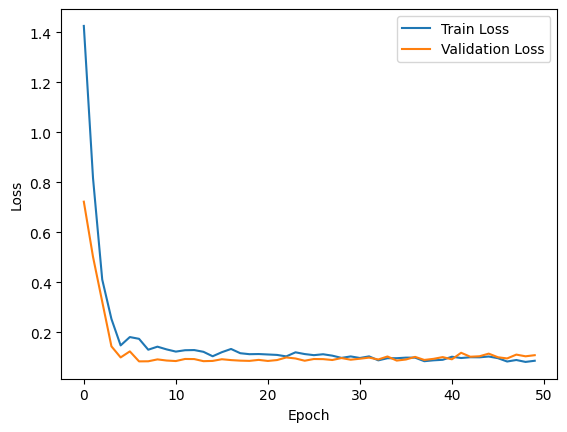

In [8]:
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
